# R codes for chapter 2

## Read file from docker

In [1]:
file="/root/app/ML_for_Hackers/02-Exploration/data/01_heights_weights_genders.csv"

In [2]:
data<-read.csv(file, sep=",", header=T)

In [6]:
summary(data)

    Gender         Height          Weight     
 Female:5000   Min.   :54.26   Min.   : 64.7  
 Male  :5000   1st Qu.:63.51   1st Qu.:135.8  
               Median :66.32   Median :161.2  
               Mean   :66.37   Mean   :161.4  
               3rd Qu.:69.17   3rd Qu.:187.2  
               Max.   :79.00   Max.   :270.0  

In [7]:
head(data, 2)

Gender,Height,Weight
Male,73.84702,241.8936
Male,68.78190,162.3105


In [8]:
summary(data$Height)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  54.26   63.51   66.32   66.37   69.17   79.00 

In [9]:
height<-with(data, Height)
summary(height)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  54.26   63.51   66.32   66.37   69.17   79.00 

## Mean function

In [10]:
my.mean<-function(x){
    return(sum(x)/length(x))
}

my.mean(data$Height)

[1] 66.36756

In [11]:
mean(data$Height)

[1] 66.36756

## Median function

In [13]:
my.median<-function(x){
    sorted.x<-sort(x)
    if(length(x) %% 2==0){
        index<-c(length(x)/2, length(x)/2+1)
        return(my.mean(sorted.x[index]))
    }
    else{
        index<-ceiling(length(x)/2)
        return(sorted.x[index])
    }
}

my.median(data$Height)
median(data$Height)

[1] 66.31807

[1] 66.31807

In [14]:
length(data$Height)

[1] 10000

In [15]:
quantile(data$Height)

0%      25%      50%      75%     100% 
54.26313 63.50562 66.31807 69.17426 78.99874

In [18]:
quantile(data$Height, probs=seq(0,1,by=0.2))

0%      20%      40%      60%      80%     100% 
54.26313 62.85901 65.19422 67.43537 69.81162 78.99874

In [19]:
?quantile

In [20]:
c(quantile(data$Height, probs=0.25), quantile(data$Height, probs=0.75))

25%      75% 
63.50562 69.17426

## Variance function

In [28]:
my.var<-function(x){
    m<-my.mean(x)
    l<-length(x)-1
    v<-sum((x-m)^2)/l
    return(v)
}

my.var(data$Height)
var(data$Height)

[1] 14.80347

[1] 14.80347

## Standard deviation

In [29]:
my.sd<-function(x){
    return(sqrt(my.var(x)))
}

my.sd(data$Height)
sd(data$Height)

[1] 3.847528

[1] 3.847528

In [3]:
library(ggplot2)

In [4]:
?ggplot2

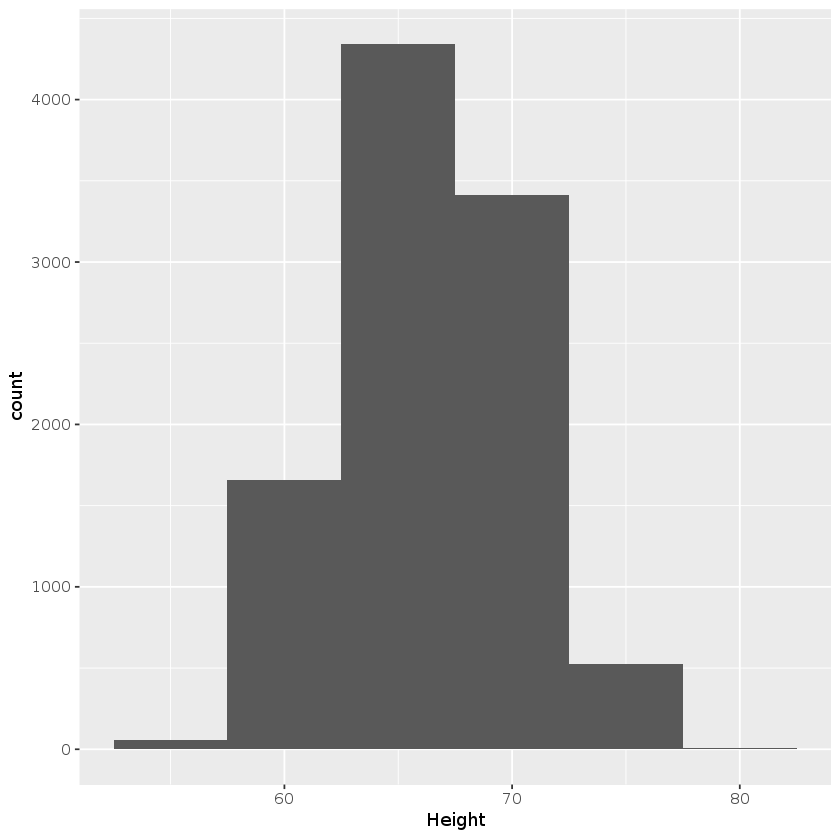

In [11]:
ggplot(data, aes(x=Height))+geom_histogram(binwidth=5)

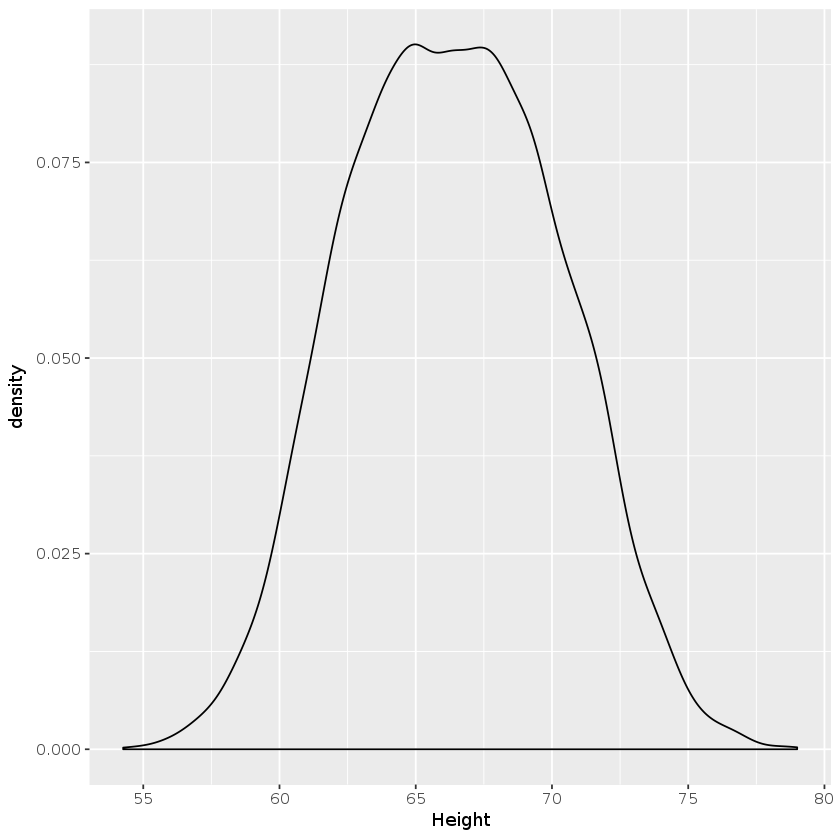

In [15]:
ggplot(data, aes(x=Height))+geom_density()

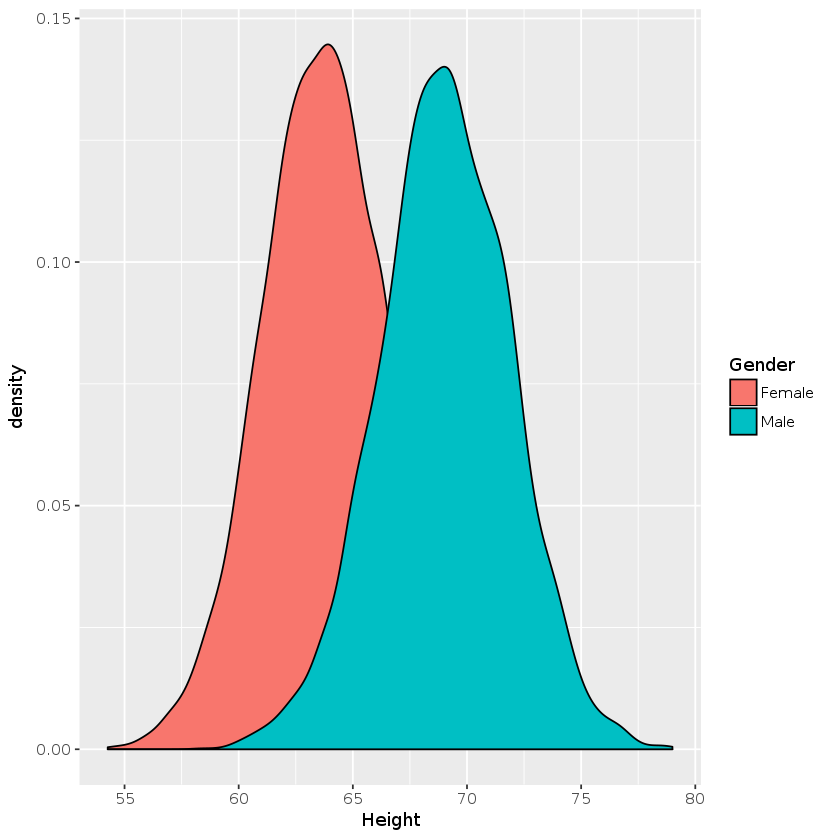

In [16]:
ggplot(data, aes(x=Height, fill=Gender))+geom_density()

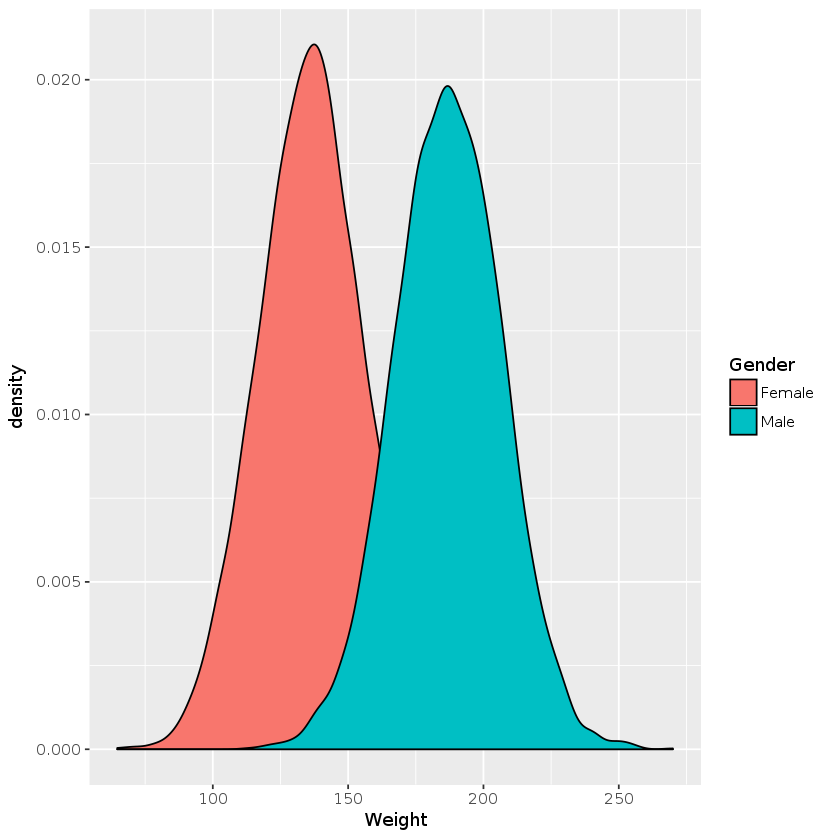

In [18]:
ggplot(data, aes(x=Weight, fill=Gender))+geom_density()

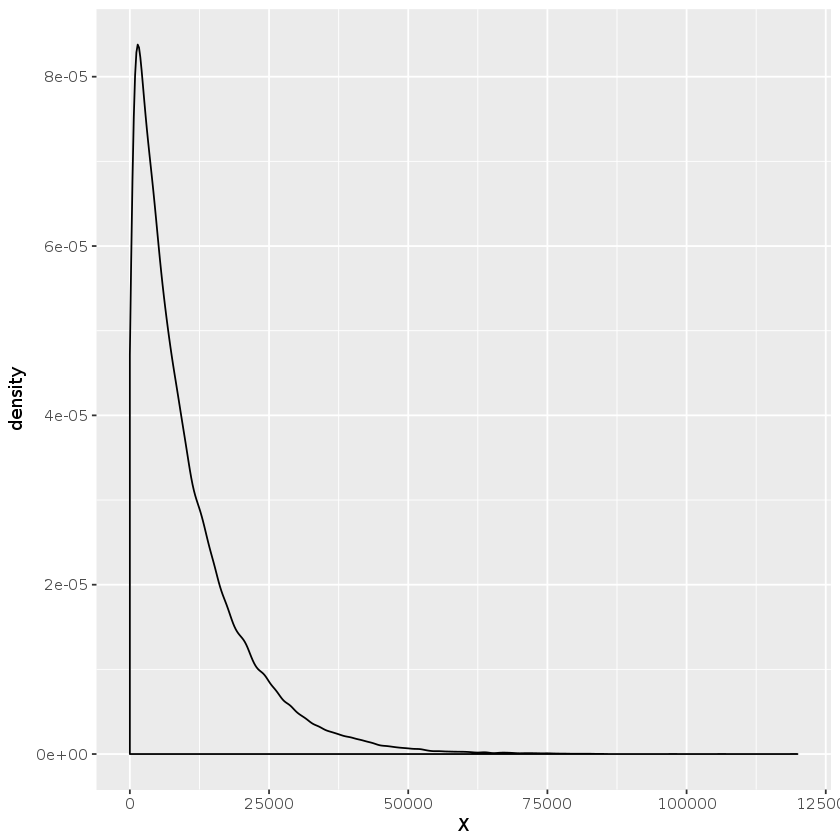

In [19]:
g<-rgamma(100000, 1, 0.0001)
ggplot(data.frame(X=g), aes(x=X))+geom_density()

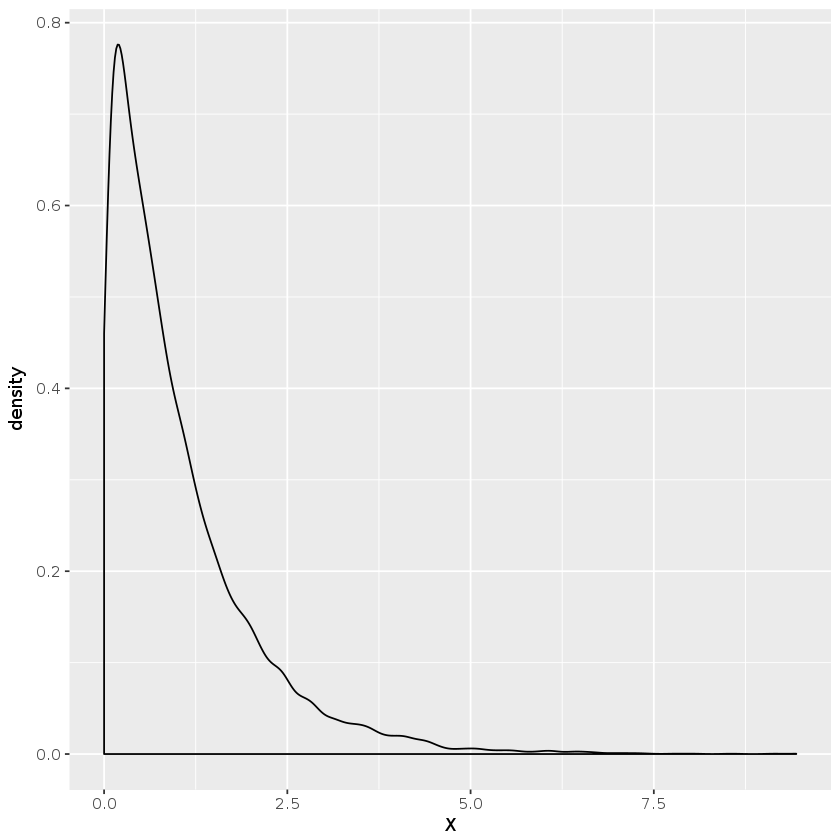

In [21]:
e<-rexp(10000)
ggplot(data.frame(X=e), aes(x=X))+geom_density()

In [42]:
library('ggplot2')

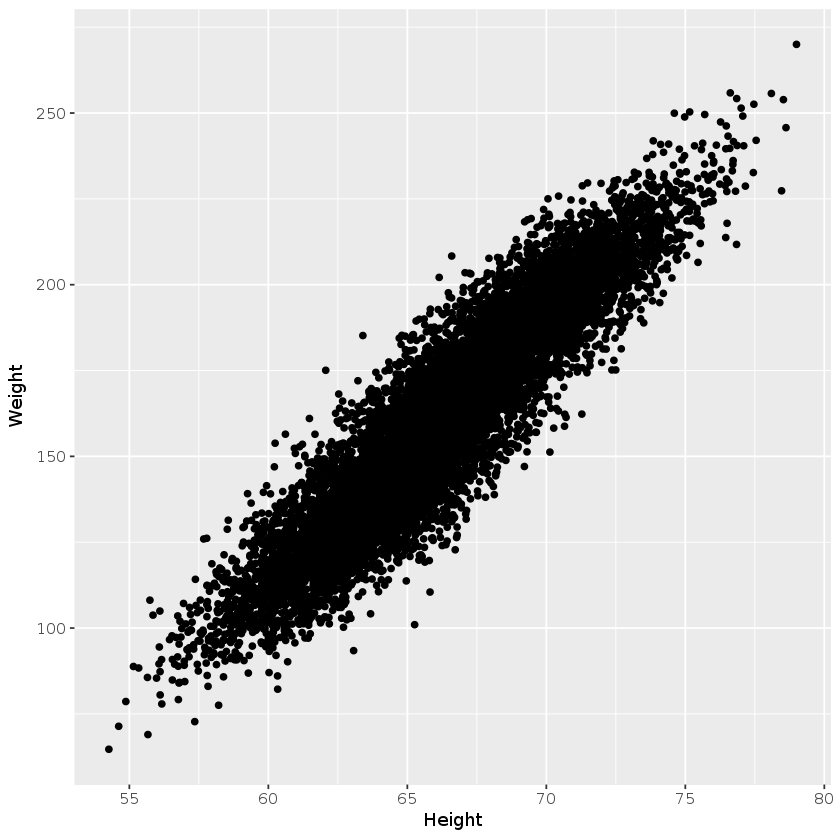

In [25]:
ggplot(data, aes(x=Height, y=Weight))+geom_point()

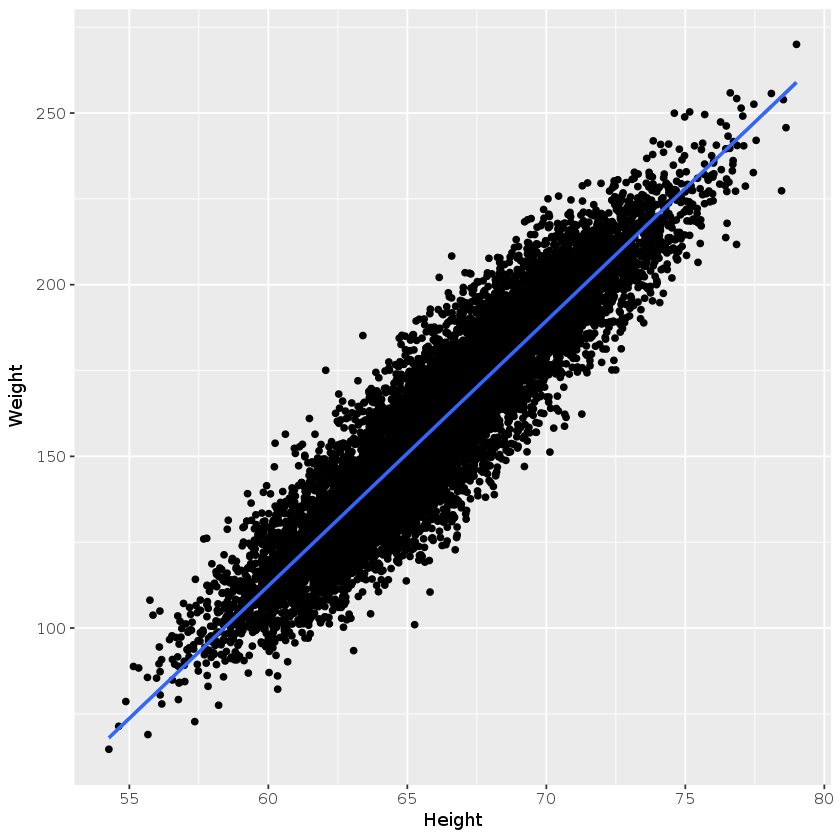

In [15]:
ggplot(data, aes(x=Height, y=Weight))+ geom_point() + geom_smooth(method='glm')

`geom_smooth()` using method = 'loess'


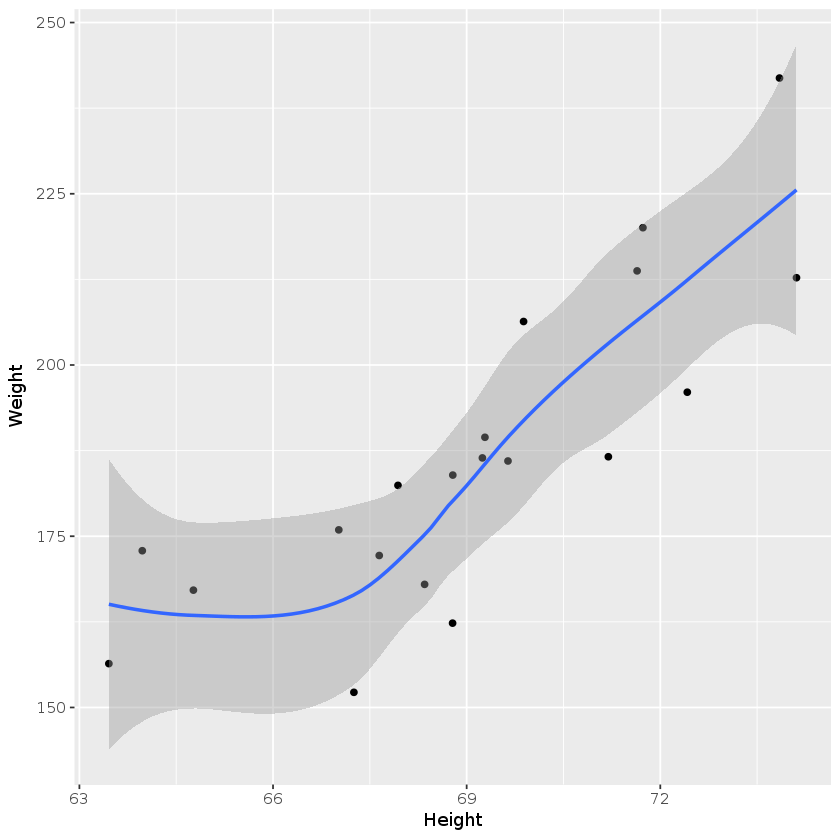

In [7]:
ggplot(data[1:20,], aes(x=Height, y=Weight))+geom_point()+geom_smooth()

In [13]:
?geom_smooth

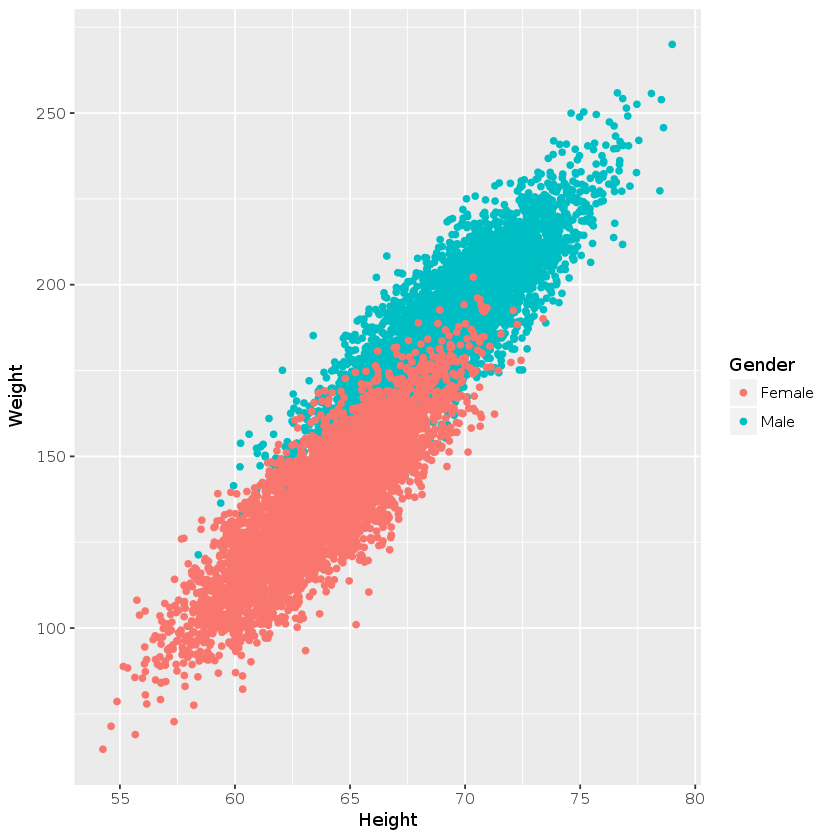

In [16]:
ggplot(data, aes(x=Height, y=Weight, color=Gender))+geom_point()

In [17]:
data<-transform(data,Male=ifelse(Gender=='Male', 1,0))

In [18]:
head(data,2)

Gender,Height,Weight,Male
Male,73.84702,241.8936,1
Male,68.78190,162.3105,1


In [20]:
model<-glm(Male ~ Height+Weight, data=data, family=binomial(link='logit'))

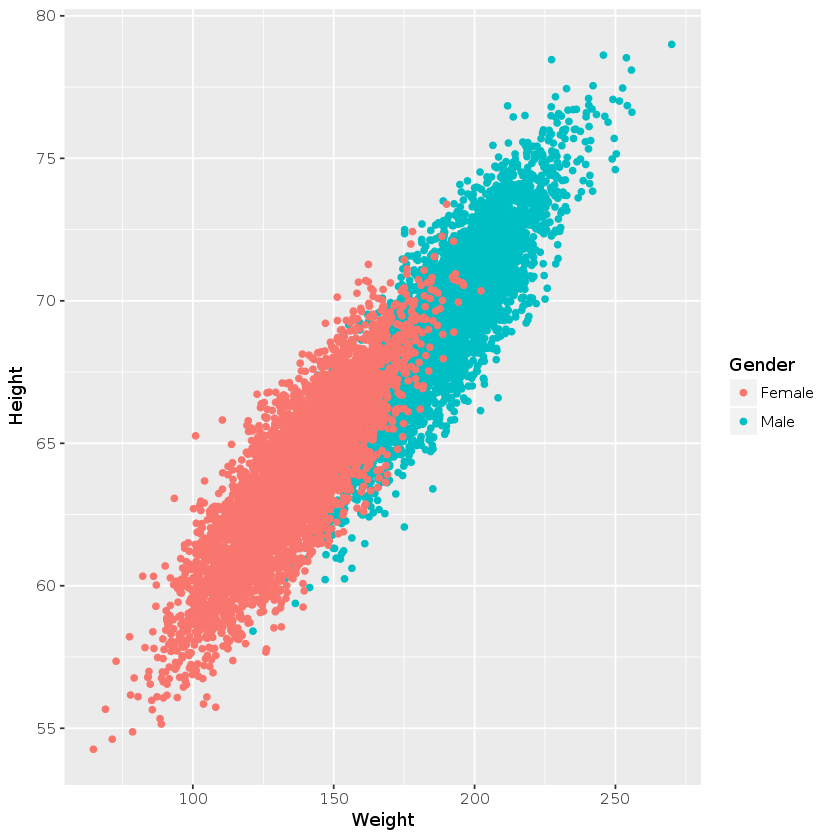

In [22]:
ggplot(data, aes(x=Weight, y=Height, color=Gender))+geom_point()